# Plot Risk Bound: Comparison Against Rademacher Bounds (Bartlett and Mendelsen 2002)
---

In [4]:
# Flag Risk-Engine that we are considering the Rademacher bound comparioson
is_Rademacher = True

---

## For Reference: Euclidean Embedding Rates

For reference, the embeddings are.  We will restrict computations to the case where $8\lceil \ln k \rceil < m\le d$ to avoid computing $k$, and only working with $\log(k)$.

| $m$ | $m<d$ | Worst-Case Distortion $(\tau(\phi))$ |
| :--- | :--- | :---: |
| $1\le m \le 2$ | Yes | $12\,k$ |
| $3 \le m \le 8 \lceil \ln k\rceil$ | Yes | $\frac{15 \, \log(k)^{1/2} k^{2/m}}{m^{1/2}}$ |
| $8 \lceil \ln k\rceil < m$ | Yes | $48 \lfloor \log_2 k + 1 \rfloor(\frac{m^{1/2} + 2 \sqrt{2}\log(k)^{1/2}}{m^{1/2} - 2\sqrt{2}\log(k)^{1/2}})^{1/2}$|
| $m\ge d$ | No | $1$ |

---

All computations correspond to the Huber loss function $\ell$ 
$$
\ell(y, \tilde{y}) = \begin{cases}
 \frac{1}{2}(y - \tilde{y})^2                   & \text{for } |y - \tilde{y}| \le \delta, \\
 \delta\ \cdot \left(|y - \tilde{y}| - \frac{1}{2}\delta\right), & \text{otherwise.}
\end{cases}
$$
for each $y,\tilde{y}\in [0,\infty)$.  Furthermore, for any $M\ge 0$; the Huber loss function satisfies:
- $1$-Lipschitz
- $\|\ell|_{[0,M]^2}\|_{\infty}= M$.

## Lipschitz Constant of Hypothesis Class

W.l.o.g. We consider $1$-Lipschitz functions but allow the option for more general classes.

In [5]:
Lip_WorstCase = 1

## Defaults Parameters (Only exist to coerce to general risk engine).
Default is 3; otherwise the comparison no longer applies to results of [Bartlett and Mendelson](https://www.jmlr.org/papers/volume3/bartlett02a/bartlett02a.pdf).

In [6]:
# Default in this model.
distortion_type = 3
# This is also default to true for the same reason.
Set_Lip_Constant = True

### Number of Samples (N)
Once the number of training samples, $N$, is set then, we consider two scenarios:
- if ``N_is_Small==True``: $N$ ranges from $\lfloor N/10 \rfloor$ to $N$
- if ``N_is_Small==True``: $N$ ranges from $N^3$ to $N^4$

Scaling the grid at size $2^p$ with $p=d$ yields the following:

In [7]:
N = 1*(10**4)

### The Structure of $\mathcal{X}$ - k vs. N

#### We set k manually or we consider the no. Points Needed to Pack a Cube:

From [George G. Lorentz, Manfred v. Golitschek, and Yuly Makovoz. Constructive approximation - Proposition 15.1.3](https://link.springer.com/book/9783642646102) the packing number of $[0,\operatorname{1}]^d$ in $\ell_{\infty}^d$ by $\ell_{\infty}^d$-balls of radius $10^{-p}$ is no more than
$$
    \Big\lceil
    2^{-d}
            \,
            \Big(10^{p}*\operatorname{diam}\Big)^d
    \Big\rceil
\le 
    k
\le 
    \Big\lceil
    3^{-d}
            \,
            \Big(10^{p}*\operatorname{diam}\Big)^d
    \Big\rceil
$$
we use this lower-bound to compute $k$.

If we only consider representation dimensions of at-least $\lceil 8 \, \ln(k)\rceil$ then $\ln(k)$ is at-most
$$
    \log(k)
\le
    (d+1)\big(
                p
                \,
                \log(10) 
            + 
                 \log(d/9)/2
    \big)    
.
$$

#### No. $\ln(k)$
Set the (natural) logarithmic number of points in the grid; i.e. induced by discrete computing limitations.

In [8]:
d = 1*(10**1)
p = 1*(10**5)

print('Distance Between Points on the Grid: '+str(10**-p))
print('Distance Between Points on the Grid: '+str(10**-p))

Distance Between Points on the Grid: 0.0
Distance Between Points on the Grid: 0.0


## Compute Diameter of $[0,1]^d$

In [14]:
diam = d**(1/2)
print('Prototypical Space: [0,'+str(diam)+']^'+str(d))

import numpy as np
print('The logarithmic number of points in the grid is at-most: '+str( int((d+1)*p*np.log(10) + np.log(d/9)/2 )))

Prototypical Space: [0,3.1622776601683795]^10
The logarithmic number of points in the grid is at-most: 2532843


In this code, we do not allow for super low-dimensional embeddings; i.e. below representation dimension $\lceil 8*\ln(k)\rceil$.  This is simply due to numerical issues with $k=\mathcal{O}(10^{pd}\,3^d)$ exploding, either as $p$ or $d$ diverge.  I.e. we can only stability work with $\ln(k)$.

In [15]:
## This version of 
# Euclidean_Distortion__Standard___log
## Computes the distortion only in the case where F is at-least 8log(k).  
## This is especially important when k is extremely large, e.g. high-dimensional grid rendering k unstorable.  
## However, we only need ln(k) to compute the distortion of  moderate/high-dimensional embeddings 
## so this is typically not an issue anyhow.  We emphasize that the empirical Rademacher complexity scales 
## at a O(c^1/(d+3)) rate, for some constant $d$ so any $F<d$ is already good enough since the slow part 
## of our bound converges at a rate of $O(k^1/F)$ for some $c,k>0$ depending on the model class, X, and on Y.

def Euclidean_Distortion__Standard___logk(F,p=p,d=d,verbose=False):

    #-----------------------#
    # Compute log grid size #
    #-----------------------#
    ln_k__1 = (d+1)
    ln_k__2 = p*np.log(10) + np.log(d/9)/2
    ln_k = ln_k__1*ln_k__2
    
    #-----------------------------------------#
    ## Case-By-Case Definition of Quantities ## 
    #-----------------------------------------#
    ## --------------------- ##
    ## High Dimensional Case ##
    ## --------------------- ##     
    if d<= F:
        if verbose:
            print('High')
        dist = 1
    else:
        ## -------------------------- ##
        ## Ultra-Low Dimensional Case ##
        ## -------------------------- ##
        ### Here we use the worst-Case embedding for general metric spaces
        if F<=2:
            if verbose:
                print('Ultra-Low')
            # Set worst-Case distortion for embedding into at-most two-dimensional Euclidean space
            dist = 12*np.exp(ln_k)
        else:
            ## -------------------- ##
            ## Low Dimensional Case ##
            ## -------------------- ##         
            if 3 <= F and F <= np.round(math.log(k),0):
                if verbose:
                    print('Low')
                dist__1 = 15
                dist__2 = (np.exp(ln_k)**(2/F))
                dist__3 = np.sqrt(ln_k/F)

                dist = dist__1*dist__2*dist__3
            else:
                ## ----------------------- ##
                ## Medium Dimensional Case ##
                ## ----------------------- ##     
                if verbose:
                    print('Med')
                dist = 48*math.floor(2*ln_k+1)

    return dist

In [16]:
def get_risk_bound__vs_BM___scalar(N,k,F,Risk_or_Concentration=True,Lip=Lip_WorstCase):
    
    # Compute Discretized Lipschitz Constant
    Lip_WorstCase__discretized = Lip_WorstCase + 1

    # Compute log grid size
    ln_k__1 = (d+1)
    ln_k__2 = p*np.log(10) + np.log(d/9)/2
    ln_k = ln_k__1*ln_k__2
    
    ## ----------------------------- ##
    ## Failsafe Low Dimensional Case ##
    ## ----------------------------- ##
    if F <= round(8*ln_k):
        # diss allow low-dimensional embeddings
        F = round(8*ln_k)
        
    #--------------------------------#
    ## Compute Euclidean Distortion ##
    #--------------------------------#
    dist = Euclidean_Distortion__Standard___log(F=F, k = k,d=d)
    
    
    
    #-------------------------------------------------------#
    ## Case-By-Case Definition of Concentration Quantities ## 
    #-------------------------------------------------------#
    
    ## ------------------------ ##
    ## Non-Low Dimensional Case ##
    ## ------------------------ ##         
    if F > 2:
        # rate
        rate = 1/(N**(1/F))
        # C_F
        C_F__1 = 2
        C_F__2 = ((F/2)-1)/(2*(1-2**(1-(F/2))))
        C_F__2 = C_F__2**(2/F)
        C_F__3 = (1+1/(2*((F/2)-1)))
        C_F__4 = np.sqrt(F)
        C_F = C_F__1*C_F__2*C_F__3*C_F__4


    
    #-----------------#
    ## Compute Bound ## 
    #-----------------#
      
    #### Get Dependancies
    bound__1 = Lip_WorstCase__discretized*diam
    bound__2 = C_F*(2*dist-1)*rate
    bound__3 = (math.log(2/delta)**.5)**dist
    bound__4 = 1/np.sqrt(N)
    #### Compute Bound
    bound = bound__1*bound__2*(bound__3+bound__4)

    return bound

get_risk_bound__vs_BM = np.vectorize(get_risk_bound__vs_BM___scalar)

### Worst-Case Lipschitz Constant

The next bit of code sets the Lipschitz constant; there are two options:
- Set Lipschitz Constant Manually (consider small classes... there is no good benchmark in this case) ``Set_Lip_Constant==True``.
- Compute Worst-Case Lipschitz constant (there are fair classical benchmarks in this case) ``Set_Lip_Constant==False``.

In [57]:
Lip_Constant_Manual = 1

### In the Case of Worst-Case Lipschitz Constants, it is computed as follows:

In [58]:
k_manual = k_X
cube_k = False
%run ./SupportFiles/Compute_N_points.ipynb

k_Y = 1/p
k_X = k_manual
k_manual = k_X*k_Y

We Consider The Worst-Case Lipschitz Constant: 1
Number of points:9.77e+04


## Import Packages and Set Global Hyperparameters

In [1]:
%run ./SupportFiles/Dependancies.ipynb
print('---')

NameError: name 'is_Rademacher' is not defined

NameError: name 'is_Rademacher' is not defined

# Set Global Parameters

## Are we Computing Risk Bounds or Concentration Bounds (in $\mathcal{W}_1$)?
- For Risk Bounds set: True
- For Concentration Bounds set: False

In [60]:
Risk_or_Concentration = True
Isometric_Embedding = True

#### Decide on How Many Points to Use?

Load Global hyperparameters, now that internal parameters have been defined.

In [61]:
%run ./SupportFiles/Global_Hyperparameters.ipynb
print('---')

Results are to Hold with Probability at-least: 95.0%
Max Representation Space Dimension (F aka m): 4.605170185988092
---


---

#### Load helper functions.

In [62]:
print('---')
%run ./SupportFiles/Helper_Functions.ipynb
print('---')

---
Helper Functions Loaded
---


# The Risk Bound Computers

We benchark our risk bound against the following one of Bartlett and Mendelsen:

From [Theorems 8 and 12](https://www.jmlr.org/papers/volume3/bartlett02a/bartlett02a.pdf) and [Lemma C.1](https://jmlr.org/papers/v24/22-1293.html) we have the following benmchark bound.

The Rademacher complexity of the class of $L$-lipschitz functions, defined on a $d$-dimensional domain is bounded as
$$
    \sup_{f \in \mathcal{F}_L} | \mathfrak{R}(f ; \mu) - \hat{\mathfrak{R}}(f) |
 \le
 2
 %%% Using Lemma C.1: Rademacher Complexity of \mathcal{F}_L defined below
    \left( \frac{8(d+1)^2D^2(16BL)^d}{N}\right)^{1/(d+3)} + 4 \sqrt{2} D \left( \frac{1}{N}\frac{(16BL)^d}{(8(d+1)D)^{d+1}}\right)^{1/(d+3)}
 %%%
 + \|\ell\|_\infty \sqrt{\frac{8\log 2/\delta}{N}}
$$
where $D := \sup_{f \in \mathcal{F}_L} \|f\|_\infty$ and $\operatorname{diam}(\mathcal{X}) \leq B$.

## Generate Plot

#### Decide on Scale of Sample Size (Range: Small N or Large N)

In [63]:
# Indices
Freq_plot = 10**2
if N_is_Small:
    indexing_set = range(1,10**5,Freq_plot)
else:
#     indexing_set = range(3,10000,Freq_plot)
    indexing_set = range(1,10,1)

In [64]:
Print_Occam = True
Agnostic_PAC_Bound = True

**Note**: If ``Set_Lip_Constant==True`` then we *do not* benchmark against the VC or Agnostic PAC bounds.

---

Load risk bound functions.

In [65]:
%run ./SupportFiles/Risk_Bound_Engine.ipynb

Risk Bounds Loaded


---

#### Compute

In [66]:
# Fast Rates
indexing_set__fastrates = range(1,50)
# Intermediary Rates vs. Distortion
indexing_set__intermediary_distortionVSConcentration = range(int(8*np.log(d)),int(8*(np.log(d)**2)))
# Low Dist
indexing_set__LowDistortion = range(int(d/2),d)

# Assemble Values
indexing_set = np.append(indexing_set__fastrates,indexing_set__intermediary_distortionVSConcentration)
indexing_set = np.append(indexing_set,indexing_set__LowDistortion)

# Keep Unique and Sort
indexing_set = np.sort(np.unique(indexing_set))

In [67]:
#### Compute digital computing bound
for i in indexing_set:
    # Set Value of F
    F_global = int(np.round(i,0))
    
#     def get_Rad_Bound__scalar(N):
#         computed_bound = Rad_Comp_Bound(N=N,F=F_global)
#         return computed_bound

#     get_Rad_Bound = np.vectorize(get_Rad_Bound__scalar)
    def get_risk_bound__NVar__MBCompare_scalar(N):
        return get_risk_bound__scalar(k=k_global,F=F_global,N=N)

    get_risk_bound__NVar__MBCompare = np.vectorize(get_risk_bound__NVar__MBCompare_scalar)
    
    if i == min(indexing_set):
        # Compute Risk Bound
        Risk_Bounds_DC = get_risk_bound__NVar__MBCompare(N_sequence)
    else:
        # Compute Risk Bound
        Risk_Bounds_DC__loop = get_risk_bound__NVar__MBCompare(N_sequence)
        Risk_Bounds_DC = np.minimum(Risk_Bounds_DC,Risk_Bounds_DC__loop)
    
#### Compute continuous space bound
Risk_Bounds_Cnt = get_Rad_Bound(N_sequence)

#### Plot

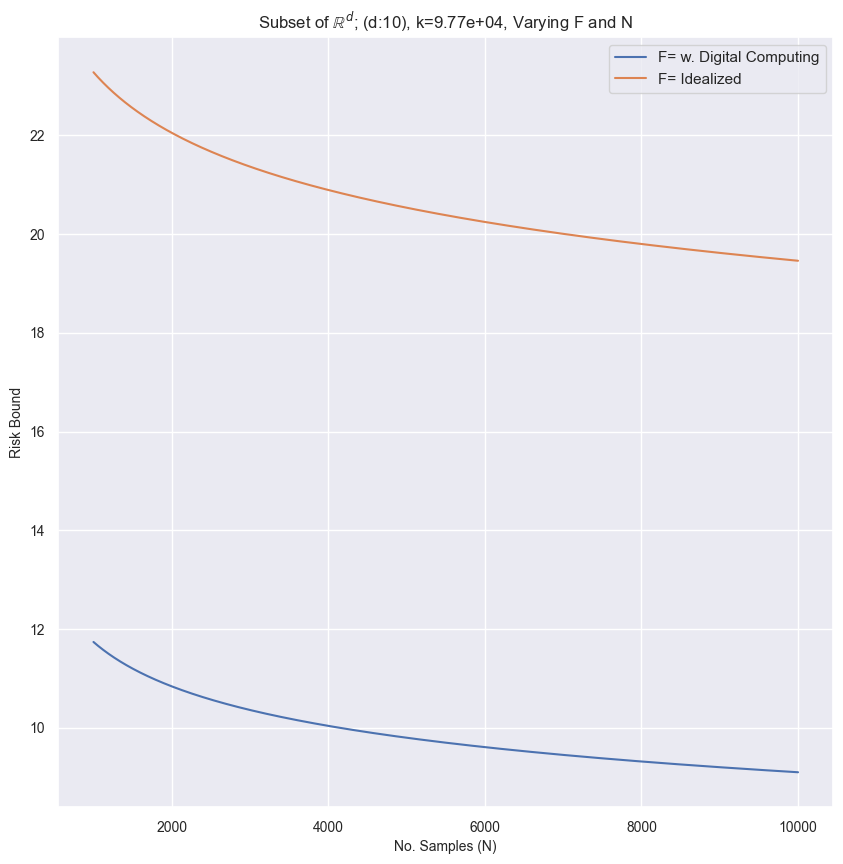

In [68]:
ax = plt.figure(figsize=(10,10))
sns.set_style("darkgrid")

plt.title(''+dist_name+', k='+str('{:.2e}'.format(k))+', Varying F and N')
    

plt.xlabel('No. Samples (N)')
plt.ylabel('Risk Bound')# on $\sup_{f\in \mathcal{F}}\,|\mathcal{R}(\hat{f})-\hat{\mathcal{R}}(\hat{f})|$')
# plt.ylabel('Bound on $\mathbb{E}[\mathcal{W}_1(\mathbb{P},\mathbb{P}^N)]$')


    
# Plot Risk-Bound
plt.plot(N_sequence, 
     Risk_Bounds_DC,
     label = 'F= w. Digital Computing')

plt.plot(N_sequence, 
     Risk_Bounds_Cnt,
     label = 'F= Idealized')

plt.legend()
    
    
plt.xlabel('No. Samples (N)',fontsize=10)
plt.ylabel('Risk Bound',fontsize=10)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

# ----------------------------------------------------- #

plt.savefig('Experiments/Risk_Bound_F/BMCompare_'+str(N_is_Small)+'____'+str(dist_name__plot)+'___d____'+str(d)+'.pdf')
plt.show()

In [69]:
print('N Min: '+latex_float(N_min))
print('N Max: '+latex_float(N_max))
print('For Paper:')
print(latex_float(N_min)+'<N<'+latex_float(N_max))
print('dimension: '+latex_float(d))
print('N. Points (k): '+latex_float(k_manual))

N Min: 1 \times 10^{3}
N Max: 1 \times 10^{4}
For Paper:
1 \times 10^{3}<N<1 \times 10^{4}
dimension: 10
N. Points (k): 0.98


---
# Fin #
---

---

---